In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
from matplotlib.patches import Circle, PathPatch, Rectangle
import time
import matplotlib.colors as mcolors


# Turns data into (x,y) points of histogram to plot
def histToPlot(data, bins):
    [histData,bins] = np.histogram(data, bins=bins)
    binCenters = np.array([0.5 * (bins[j] + bins[j+1]) for j in range(len(bins)-1)])
    return binCenters, histData

# For creating basic histograms

# For creating basic histograms
def basicHist(data, bins=100, save=False, name="", mean=False, show=False, hRange=[], xlim=[], ylim=[], xlabel="", ylabel="", logx=False, logy=False, area_max_plot=-99999999,legHand=[],save_dir=None,fig_dict=None,label=None,color=None):
    # Get existing plot by same name, if it exists
    try:
        fig, ax = fig_dict[name]
    except (TypeError, KeyError):
        fig, ax = pl.subplots()
    if len(hRange) > 1:
        cut = (data>hRange[0])*(data<hRange[1])
        data = data[cut]
        ax.hist(data, bins, range=(hRange[0],hRange[1]), histtype='step',label=label,color=color )
    else: ax.hist(data, bins, histtype='step',label=label,color=color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if mean and area_max_plot<np.mean(data) and (fig_dict is None): ax.axvline(x=np.mean(data), ls='--', color='r')
    if len(xlim) > 1: ax.xlim(xlim[0],xlim[1])
    if len(ylim) > 1: ax.ylim(ylim[0],ylim[1])
    if logx: ax.set_xscale("log")
    if logy: ax.set_yscale("log")
    if len(legHand) > 0: ax.legend(handles=legHand)
    elif fig_dict is not None: ax.legend()
    if save and save_dir is not None: fig.savefig(str(save_dir)+str(name)+".png")
    if fig_dict is not None: # save figure and axis info to dictionary for later use
        fig_dict[name] = (fig, ax)
    if show: ax.show()

    return

# For creating basic scatter plots
def basicScatter(xdata, ydata, s=[], c=[], save=False, name="", mean=False, show=False, xlim=[], ylim=[], xlabel="", ylabel="", logx=False, logy=False, area_max_plot=-99999999,legHand=[],save_dir=None,showsipms=False):
    pl.figure()
    if showsipms:
        w = 0.6 # Photosensitive area in cm
        d_x = 1.23 # cm
        d_y = 1.14 # cm
        r = 1.5 # cm, active TPC radius
        c1 = pl.Circle((0., 0.), r, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r1 = pl.Rectangle((d_x/2.-w/2., d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r2 = pl.Rectangle((d_x/2.-w/2., -d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r3 = pl.Rectangle((-d_x/2.-w/2., -d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r4 = pl.Rectangle((-d_x/2.-w/2., d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        #pl.gca().add_patch(c1)
        #pl.gca().add_patch(r1)
        #pl.gca().add_patch(r2)
        #pl.gca().add_patch(r3)
        #pl.gca().add_patch(r4)
        pl.axis('square')
    pl.scatter(xdata, ydata, s=s, c=c)

    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    
    if mean and area_max_plot<np.mean(xdata): pl.axvline(x=np.mean(xdata), ls='--', color='r')
    if len(xlim) > 1: pl.xlim(xlim[0],xlim[1])
    if len(ylim) > 1: pl.ylim(ylim[0],ylim[1])
    if logx: pl.xscale("log")
    if logy: pl.yscale("log")
    if len(legHand) > 0: pl.legend(handles=legHand)
    if save and save_dir is not None: pl.savefig(str(save_dir)+str(name)+".png")
    if show: pl.show()
    pl.close()

    return

# For creating heatmaps, i.e. 2D histograms (can be weighted if desired)
def basicHeatmap(xdata, ydata, weights=None, bins=40, save=False, name="", show=False, xlim=[], ylim=[], cmin=1e-12, cmax=None, xlabel="", ylabel="", logx=False, logy=False, logz=False, legHand=[], save_dir=None):
    pl.figure()
    if len(xlim)>1 and len(ylim)>1: hist_range = [xlim, ylim]
    else: hist_range = None
    if logz: norm = mcolors.LogNorm()
    else: norm = mcolors.Normalize()
    _, _, _, image = pl.hist2d(xdata, ydata, bins=bins, range=hist_range, weights=weights, cmin=cmin, cmax=cmax, norm=norm)
    pl.colorbar(image)

    pl.xlabel(xlabel)
    pl.ylabel(ylabel)

    if logx: pl.xscale("log")
    if logy: pl.yscale("log")
    if len(legHand) > 0: pl.legend(handles=legHand)
    if save and save_dir is not None: pl.savefig(str(save_dir)+str(name)+".png")
    if show: pl.show()
    pl.close()

    return

fig_dict = None

# set plotting style
if fig_dict is not None:
    mpl.rcParams['font.size']=18
    mpl.rcParams['legend.fontsize']='large'
else:
    mpl.rcParams['font.size']=10
    mpl.rcParams['legend.fontsize']='small'
mpl.rcParams['figure.autolayout']=True
mpl.rcParams['figure.figsize']=[8.0,6.0]
mpl.rcParams['figure.max_open_warning']=False

# use for coloring pulses
pulse_class_colors = np.array(['blue', 'green', 'red', 'magenta', 'darkorange'])
pulse_class_labels = np.array(['Other', 'S1-like LXe', 'S1-like gas', 'S2-like', 'Merged S1/S2'])
pc_legend_handles=[]
for class_ind in range(len(pulse_class_labels)):
    pc_legend_handles.append(mpl.patches.Patch(color=pulse_class_colors[class_ind], label=str(class_ind)+": "+pulse_class_labels[class_ind]))

# define DAQ and other parameters
tscale = (8.0/4096.0)     # = 0.002 µs/sample, time scale

n_sipms = 32
n_channels = n_sipms+1 # includes sum
d_between_SiPM_center_x = 1.23 # cm
d_between_SiPM_center_y = 1.14 # cm
    
# define top, bottom channels
n_top = int((n_channels-1)/2)
top_channels=np.array(range(n_top),int)
bottom_channels=np.array(range(n_top,2*n_top),int)

In [4]:

data_dir = "G:/.shortcut-targets-by-id/11qeqHWCbcKfFYFQgvytKem8rulQCTpj8/crystalize/data/data-202204/20220415/202204151553_1bar_2200C_2000G_0A_54B_15us_0.5Vpp/"
save_dir = data_dir


#read RQ
listrq = np.load(data_dir+'rq.npz')

n_events = listrq['n_events'][()]
n_pulses = listrq['n_pulses']
n_s1 = listrq['n_s1']
n_s2 = listrq['n_s2']
s1_before_s2 = listrq['s1_before_s2']
p_area = listrq['p_area']
p_class = listrq['p_class']
drift_Time = listrq['drift_Time']
drift_Time_AS = listrq['drift_Time_AS']
p_max_height = listrq['p_max_height']
p_min_height = listrq['p_min_height']
p_width = listrq['p_width']
p_afs_2l = listrq['p_afs_2l']
p_afs_50 = listrq['p_afs_50']
p_area_ch = listrq['p_area_ch']
p_area_ch_frac = listrq['p_area_ch_frac']
p_area_top = listrq['p_area_top']
p_area_bottom = listrq['p_area_bottom']
p_tba = listrq['p_tba']
p_start = listrq['p_start']
p_end = listrq['p_end']
sum_s1_area = listrq['sum_s1_area']
sum_s2_area = listrq['sum_s2_area']
center_top_x = listrq['center_top_x']
center_top_y = listrq['center_top_y']
center_bot_x = listrq['center_bot_x']
center_bot_y = listrq['center_bot_y']
center_bot_x_d = center_bot_x * d_between_SiPM_center_x/2
center_bot_y_d = center_bot_y * d_between_SiPM_center_y/2
center_top_x_d = center_top_x * d_between_SiPM_center_x/2
center_top_y_d = center_top_y * d_between_SiPM_center_y/2

listrq.close()
#end of RQ read

p_t_rise = tscale*(p_afs_50-p_afs_2l)

# Define some standard cuts for plotting
cut_dict = {}
cut_dict['ValidPulse'] = p_area > 0.1
cut_dict['PulseClass0'] = p_class == 0
cut_dict['S1'] = ((p_class == 1) + (p_class == 2))*cut_dict['ValidPulse']
n_s1 = np.sum(cut_dict['S1'], axis=1) # redefine to only include valid pulses
cut_dict['S2'] = ((p_class == 3) + (p_class == 4))*cut_dict['ValidPulse']
n_s2 = np.sum(cut_dict['S2'], axis=1)
cut_dict['Co_peak'] = (p_area>30)*(p_area<60)
cut_dict['SmallS1'] = cut_dict['S1']*(p_area<500)
cut_dict['LargeS1'] = cut_dict['S1']*(p_area>500)
cut_dict['TopCo'] = cut_dict['S1']*(p_tba>0.0)*(p_area>200)
cut_dict['TopS1'] = cut_dict['S1']*(p_tba>0.75)
cut_dict['PoS1'] = cut_dict['S1']*(p_tba<0)*(p_tba>-1)*(p_area>10000)*(p_area<40000)
cut_dict['PoUpS1'] = cut_dict['S1']*(p_tba<0)*(p_tba>-0.7)*(p_area>10000)*(p_area<40000)
cut_dict['PoDownS1'] = cut_dict['S1']*(p_tba<-0.7)*(p_tba>-1)*(p_area>10000)*(p_area<40000)
cut_dict['PoSmallS1'] = cut_dict['S1']*(p_tba<-0.25)*(p_tba>-1)*(p_area>0)*(p_area<2000)
cut_dict['PoMedS1'] = cut_dict['S1']*(p_tba<-0.25)*(p_tba>-1)*(p_area>2000)*(p_area<5000)
cut_dict['PoMedLgS1'] = cut_dict['S1']*(p_tba<-0.75)*(p_tba>-1)*(p_area>5000)*(p_area<10000)
cut_dict['S1_200-400phd'] = cut_dict['S1']*(p_area>200)*(p_area<400)
cut_dict['S1_0-200phd'] = cut_dict['S1']*(p_area>0)*(p_area<200)

# Pick which cut from cut_dict to apply here and whether to save plots
save_pulse_plots=True # One entry per pulse
save_S1S2_plots=True # One entry per S1 (S2) pulse
save_event_plots=True # One entry per event
save_2S2_plots=True # One entry per event w/ 2 S2s
save_PoS1_plots=False # One entry per event w/ 1 Po S1, specific to studies of S2 multiplicity
pulse_cut_name = 'ValidPulse'#'Co_peak'#'PoS1'#
pulse_cut = cut_dict[pulse_cut_name]



cleanArea = p_area[pulse_cut].flatten()
cleanMax = p_max_height[pulse_cut].flatten()
cleanMin = p_min_height[pulse_cut].flatten()
cleanWidth = tscale*p_width[pulse_cut].flatten()
cleanHeight = p_max_height[pulse_cut].flatten()
cleanPulseClass = p_class[pulse_cut].flatten()

cleanAFS2l = p_afs_2l[pulse_cut].flatten()
cleanAFS50 = p_afs_50[pulse_cut].flatten()
cleanRiseTime = p_t_rise[pulse_cut].flatten()

cleanAreaCh = p_area_ch[pulse_cut] # pulse_cut gets broadcast to the right shape
cleanAreaChFrac = p_area_ch_frac[pulse_cut]
cleanAreaTop = p_area_top[pulse_cut].flatten()
cleanAreaBottom = p_area_bottom[pulse_cut].flatten()
cleanTBA = p_tba[pulse_cut].flatten()
# Note: TBA can be <-1 or >+1 if one of top or bottom areas is <0 (can still be a valid pulse since total area >0)
cleanCenterBottomX = center_bot_x_d[pulse_cut]
cleanCenterBottomY = center_bot_y_d[pulse_cut]
cleanCenterTopX = center_top_x_d[pulse_cut]
cleanCenterTopY = center_top_y_d[pulse_cut]

s1_cut = pulse_cut*cut_dict['S1']
cleanS1Area = p_area[s1_cut].flatten()
cleanS1RiseTime = p_t_rise[s1_cut].flatten()
cleanS1AreaChFrac = p_area_ch_frac[s1_cut]
cleanS1TBA = p_tba[s1_cut].flatten()

s2_cut = pulse_cut*cut_dict['S2']
cleanS2Area = p_area[s2_cut].flatten()
cleanS2RiseTime = p_t_rise[s2_cut].flatten()
cleanS2AreaChFrac = p_area_ch_frac[s2_cut]
cleanS2TBA = p_tba[s2_cut].flatten()


# Quantities for plotting only events with n number of pulses, not just all of them
# May still contain empty pulses
howMany = n_pulses < 1000 # How many pulses you do want
nArea = p_area[howMany,:]
nMax = p_max_height[howMany,:]
nmin = p_min_height[howMany,:]
nWidth = p_width[howMany,:]

na2l = p_afs_2l[howMany]
na50 = p_afs_50[howMany]


# Event level quantities
event_cut_dict = {}
event_cut_dict["SS"] = (drift_Time > 0)*(n_s1==1)*(n_s2==1) # only include valid pulses
event_cut_dict["AllEvents"] = n_pulses > 0
event_cut_dict["All_Scatter"] = (drift_Time_AS > 0)*(n_s1==1)*(n_s2>0)
event_cut_dict["MS"] = (n_s1 == 1)*(n_s2 > 1)*s1_before_s2
event_cut_dict["Po"] = event_cut_dict["SS"]*np.any((p_tba<-0.0)*(p_tba>-1)*(p_area>10000)*(p_area<40000)*cut_dict["S1"], axis=1)#np.any((p_tba<-0.85)*(p_tba>-0.91)*(p_area>1500)*(p_area<2700), axis=1) # true if any pulse in event matches these criteria
event_cut_dict["Po_AS"] = (drift_Time_AS>0.)*(drift_Time_AS<1.5)*np.any((p_tba<-0.6)*(p_tba>-1)*(p_area>5000)*(p_area<20000), axis=1)#np.any((p_tba<-0.85)*(p_tba>-0.91)*(p_area>1500)*(p_area<2700), axis=1) # true if any pulse in event matches these criteria
event_cut_dict["Co-like"] = event_cut_dict["SS"]*np.any((p_area<1000.)*cut_dict["S1"], axis=1)
event_cut_dict["Co-like_AS"] = event_cut_dict["All_Scatter"]*np.any((p_area<1000.)*cut_dict["S1"], axis=1)
event_cut_dict["lg_S1"] = event_cut_dict["SS"]*np.any((p_area>1000.)*cut_dict["S1"], axis=1) # true if any S1 has area>1000
event_cut_dict["2S2"] = (np.sum(cut_dict['S2'], axis=1)==2)
event_cut_dict["SS_1-2us"] = event_cut_dict["SS"]*(drift_Time > 1)*(drift_Time < 2)
event_cut_dict["PoS1"] = (np.sum(cut_dict['PoS1'], axis=1)==1)#*(n_s2>0)

event_cut_name = "SS"#"Co-like_AS"#"Po"#"lg_S1"
event_cut = event_cut_dict[event_cut_name]
cleanSumS1 = sum_s1_area[event_cut]
cleanSumS2 = sum_s2_area[event_cut]
# For events passing event_cut, get area-weighted avg of TBA for S1s only
cleanAvgS1TBA = np.sum(p_area[event_cut]*p_tba[event_cut]*s1_cut[event_cut],axis=1)/np.sum(p_area[event_cut]*s1_cut[event_cut],axis=1)
cleanSumS1TBA = p_tba[event_cut_dict['SS'][:,np.newaxis]*cut_dict['S1']]
cleanDT = drift_Time[event_cut]
cleanDT_AS = drift_Time_AS[event_cut]

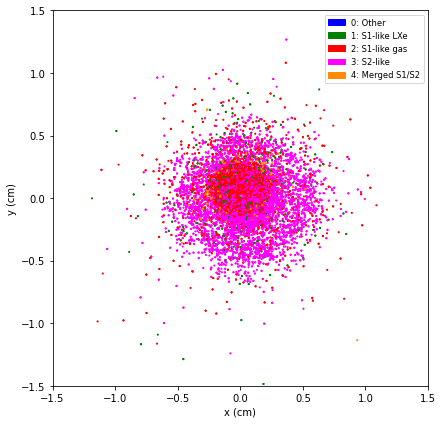

In [6]:

# Example plot
basicScatter(cleanCenterTopX, cleanCenterTopY, s=1.2, c=pulse_class_colors[cleanPulseClass], xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], xlabel="x (cm)", ylabel="y (cm)", legHand=pc_legend_handles, name="TopCentroid_" + pulse_cut_name, save=save_pulse_plots, save_dir=save_dir, showsipms=True, show=True)
